# Part Failure Prediction: Data Exploration 

**Objective:** To understand the dataset, identify patterns, and check for issues like missing values or class imbalance before building the model.

### 1. Import Libraries and Load Data

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style('whitegrid')

# Load the dataset
df = pd.read_csv(r'C:\Users\ishan.sinha\OneDrive - Siemens Energy\Desktop\PPFD project\Predictive_Part_Failure_Dashboard\ml_model\data\service_history_extended.csv')

### 2. Initial Data Inspection

In [11]:
print("First 5 rows of the dataset:")
display(df.head())

print("\nDataset Information:")
df.info()

print("\nNumerical Summary:")
display(df.describe())

First 5 rows of the dataset:


,service_id,machine_id,part_id,service_date,time_in_service_days,service_type,part_failed
0,1001,H-281,P-SEN-04,1/12/2022,329,Routine Check,0
1,1002,H-267,P-VLV-01,1/25/2022,324,Routine Check,0
2,1003,H-281,P-MTR-05,1/31/2022,141,Routine Check,0
3,1004,M-154,P-CTR-03,2/12/2022,154,Routine Check,0
4,1005,M-185,P-SEN-04,2/22/2022,159,Routine Check,0



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   service_id            300 non-null    int64 
 1   machine_id            300 non-null    object
 2   part_id               300 non-null    object
 3   service_date          300 non-null    object
 4   time_in_service_days  300 non-null    int64 
 5   service_type          300 non-null    object
 6   part_failed           300 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 16.5+ KB

Numerical Summary:


,service_id,time_in_service_days,part_failed
count,300.000000,300.000000,300.000000
mean,1150.500000,318.083333,0.223333
std,86.746758,178.823421,0.417176
min,1001.000000,100.000000,0.000000
25%,1075.750000,190.750000,0.000000
50%,1150.500000,274.000000,0.000000
75%,1225.250000,348.250000,0.000000
max,1300.000000,742.000000,1.000000


### 3. Check Target Variable Distribution (Class Imbalance)

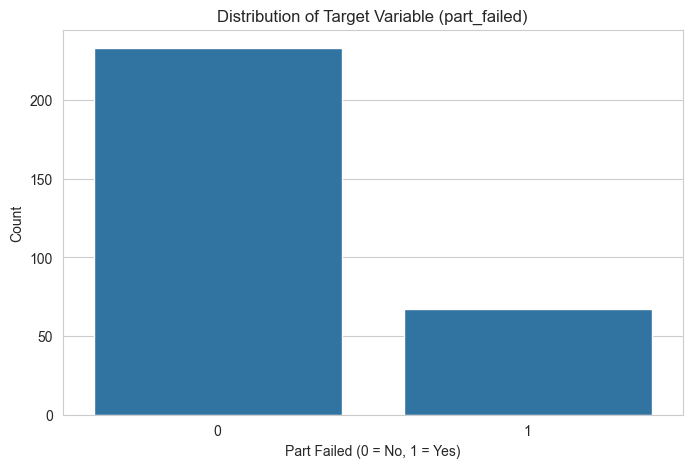

Failure Rate:
part_failed
0    77.666667
1    22.333333
Name: proportion, dtype: float64


In [4]:
plt.figure(figsize=(8, 5))
sns.countplot(x='part_failed', data=df)
plt.title('Distribution of Target Variable (part_failed)')
plt.xlabel('Part Failed (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

failure_rate = df['part_failed'].value_counts(normalize=True) * 100
print(f"Failure Rate:\n{failure_rate}")

**Observation:** The dataset is imbalanced. Failures (Class 1) make up about 25% of the data. This is important to consider during model training.

### 4. Analyze Feature Relationships

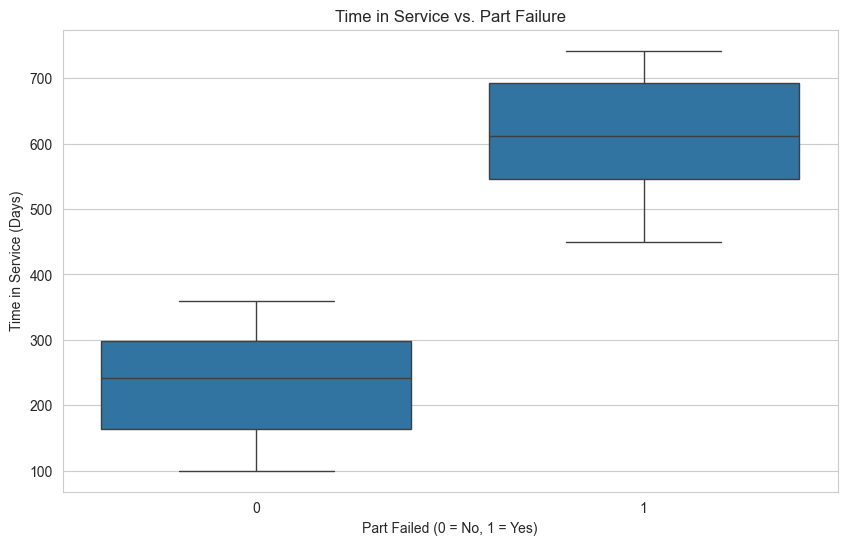

In [5]:
# Time in Service vs. Failure
plt.figure(figsize=(10, 6))
sns.boxplot(x='part_failed', y='time_in_service_days', data=df)
plt.title('Time in Service vs. Part Failure')
plt.xlabel('Part Failed (0 = No, 1 = Yes)')
plt.ylabel('Time in Service (Days)')
plt.show()

**Observation:** As expected, parts that failed have a significantly higher median `time_in_service_days`.

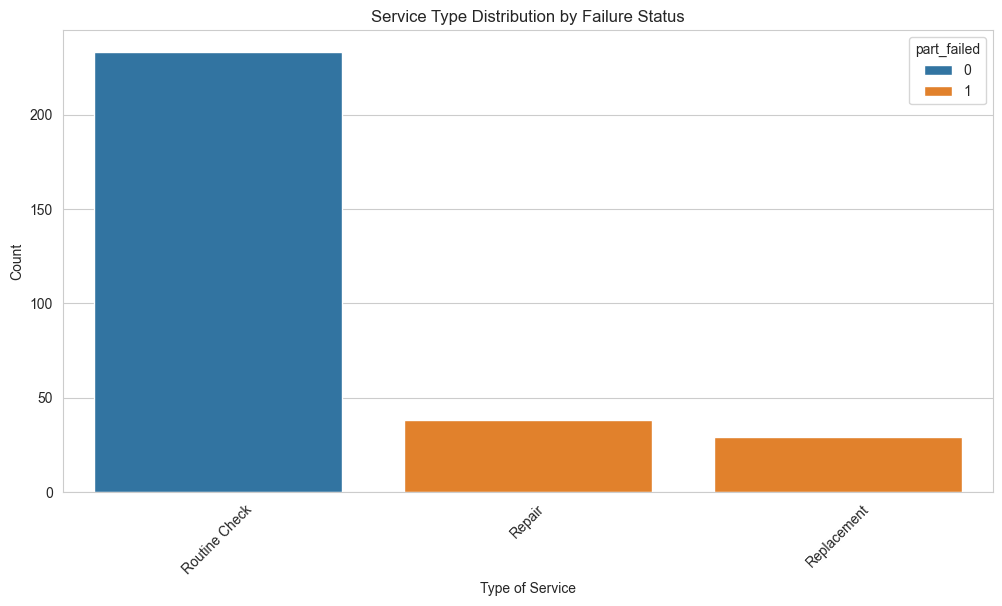

In [6]:
# Service Type vs. Failure
plt.figure(figsize=(12, 6))
sns.countplot(x='service_type', hue='part_failed', data=df)
plt.title('Service Type Distribution by Failure Status')
plt.xlabel('Type of Service')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Observation:** 'Replacement' and 'Repair' service types are exclusively associated with part failures, while 'Routine Check' is associated with non-failures. This is a very strong predictor.

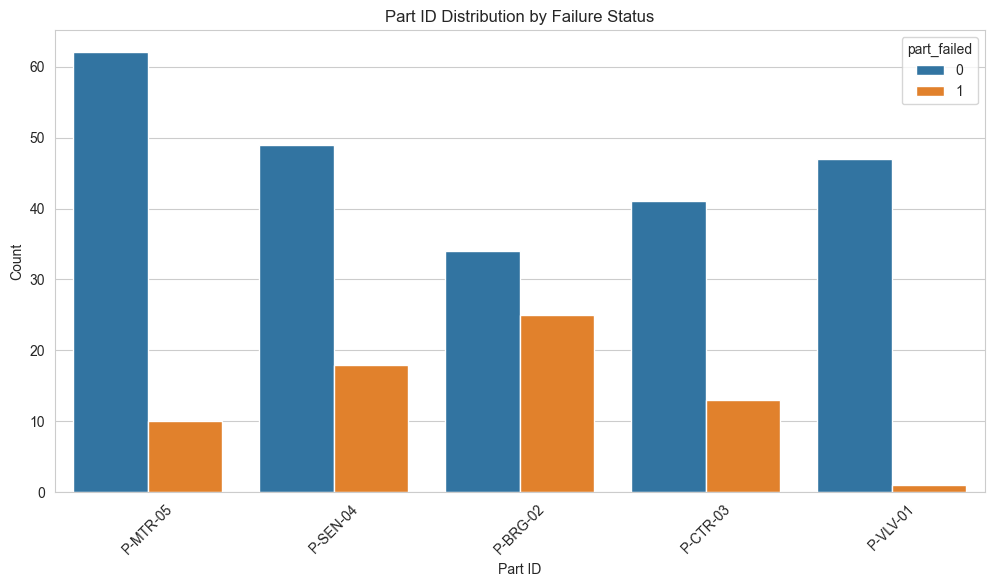

In [ ]:
Part ID vs. Failure
plt.figure(figsize=(12, 6))
sns.countplot(x='part_id', hue='part_failed', data=df, order=df['part_id'].value_counts().index)
plt.title('Part ID Distribution by Failure Status')
plt.xlabel('Part ID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


**Observation:** Some parts, like `P-BRG-02`, appear to have a higher failure rate than others.